In [2]:
from photutils.detection import DAOStarFinder
from photutils.psf import PSFPhotometry
from photutils.psf import IntegratedGaussianPRF
from astropy.io import fits 
from matplotlib import pyplot as plt
import numpy as np

In [3]:
ls /Users/abarnes/Dropbox/work/Smallprojects/aces/data/jwst/

jw02092-o002_t001_nircam_clear-f210m_i2d.fits
jw02092-o002_t001_nircam_clear-f360m_i2d.fits
jw02092-o002_t001_nircam_clear-f480m_i2d.fits
jw02092-o002_t001_nircam_clear-f480m_i2d_contsub.fits
jw02092-o002_t001_nircam_f150w2-f162m_i2d.fits
jw02092-o004_t001_miri_f2100w_i2d.fits
jw02092-o004_t001_miri_f770w_i2d.fits


In [4]:
# hdu = fits.open('/Users/abarnes/Dropbox/work/Smallprojects/aces/data/jwst/jw02092-o004_t001_miri_f770w_i2d.fits')
hdu = fits.open('/Users/abarnes/Dropbox/work/Smallprojects/aces/data/jwst/jw02092-o004_t001_miri_f2100w_i2d.fits')

data = hdu['SCI'].data
# data = data[0:1600, 1000:3000]
data = data[0:500, 2000:2500]
# data = data/np.nanmax(data)

In [23]:
hdu = fits.open('/Users/abarnes/Dropbox/work/Smallprojects/aces/data/jwst/jw02092-o002_t001_nircam_clear-f480m_i2d.fits')

data = hdu['SCI'].data
data = data[0:1000, 3000:4000]
# data = data[0:2000, :]
# data = data/np.nanmax(data)

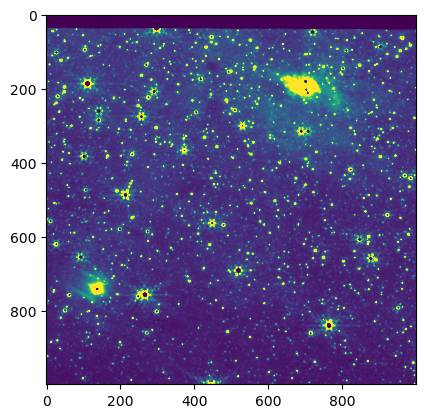

In [24]:
plt.imshow(data, vmin=np.nanmin(data), vmax=np.nanmax(data)*0.05)

In [25]:
psf_model = IntegratedGaussianPRF(flux=1, sigma=2)
fit_shape = (3, 3)
finder = DAOStarFinder(50.0, 4.0)
psfphot = PSFPhotometry(psf_model, fit_shape, finder=finder, aperture_radius=10)
phot = psfphot(data)

In [26]:
resid = psfphot.make_residual_image(data, (100, 100))

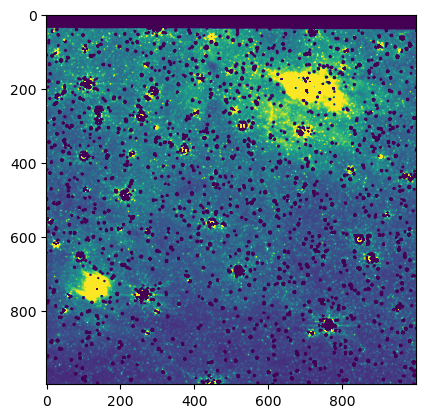

In [27]:
plt.imshow(resid, vmin=np.nanmin(data), vmax=np.nanmax(data)*0.02)

In [167]:
hdu_resid = fits.PrimaryHDU(resid, hdu['SCI'].header)
hdu_resid.writeto('/Users/abarnes/Dropbox/work/Smallprojects/aces/data/jwst/jw02092-o002_t001_nircam_clear-f480m_i2d_contsub.fits', overwrite=True)